In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics


In [11]:
import pandas as pd

# Load data
tweet_df = pd.read_csv('C:/Users/Muhammad Umar/Downloads/DataCamp Project/tweets.csv')

# Create target
y = tweet_df['author']

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'], y, test_size=0.33, random_state=53)

In [16]:
# Create a CountVectorizer object with English stop words removed, a minimum frequency of 0.05, and a maximum frequency of 0.9
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Fit and transform the training data using the CountVectorizer object
count_train = count_vectorizer.fit_transform(X_train)

# Transform the testing data using the CountVectorizer object
count_test = count_vectorizer.transform(X_test)

# Create a TfidfVectorizer object with English stop words removed, a minimum frequency of 0.05, and a maximum frequency of 0.9
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# Fit and transform the training data using the TfidfVectorizer object
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the TfidfVectorizer object
tfidf_test = tfidf_vectorizer.transform(X_test)

In [17]:
# Train and test a Multinomial Naive Bayes Classifier using the TF-IDF vectors
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

# Train and test a Multinomial Naive Bayes Classifier using the count vectors
count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)
count_nb_pred = count_nb.predict(count_test)
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)


print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.803030303030303
NaiveBayes Count Score:  0.7954545454545454


In [18]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Confusion matrix, without normalization
Confusion matrix, without normalization


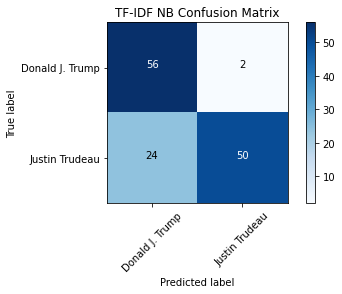

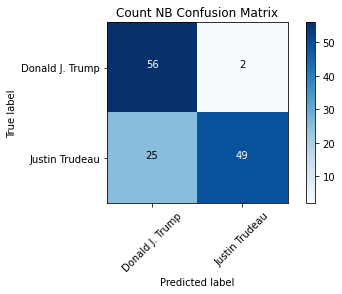

In [20]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
from helper_functions import plot_confusion_matrix

# Calculate the confusion matrices for the tfidf_nb model and count_nb models
tfidf_nb_cm = confusion_matrix(y_test, tfidf_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
count_nb_cm = confusion_matrix(y_test, count_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])

# Plot the tfidf_nb_cm confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix")

# Plot the count_nb_cm confusion matrix without overwriting the first plot 
plot_confusion_matrix(count_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="Count NB Confusion Matrix", figure=1)


LinearSVC Score:   0.841
Confusion matrix, without normalization


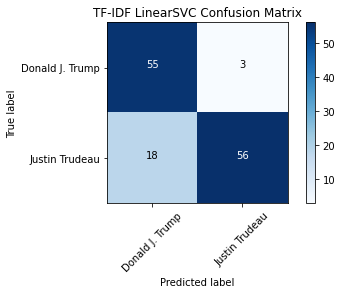

In [21]:
# Create a LinearSVC model
tfidf_svc = LinearSVC()

# Fit the training data and target labels to the model
tfidf_svc.fit(tfidf_train, y_train)

# Get the model's predictions on the test data
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculate the accuracy score using the metrics module
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Calculate the confusion matrix for the tfidf_svc model
svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=["Donald J. Trump", "Justin Trudeau"])

# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(svc_cm, classes=["Donald J. Trump", "Justin Trudeau"], title="TF-IDF LinearSVC Confusion Matrix")


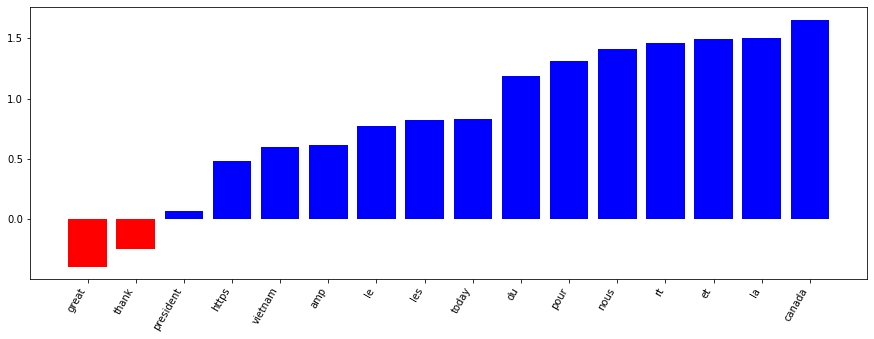

[(-0.39597918440365487, 'great'),
 (-0.24645361118000164, 'thank'),
 (0.06257407351639975, 'president'),
 (0.48212010907447506, 'https'),
 (0.5960535440710286, 'vietnam'),
 (0.6155537872526274, 'amp'),
 (0.7725831094655369, 'le'),
 (0.8213791800152532, 'les'),
 (0.8286545613113, 'today'),
 (1.1869020026437351, 'du'),
 (1.314357047994394, 'pour'),
 (1.412258419642903, 'nous'),
 (1.4612734375189422, 'rt'),
 (1.4991784378595245, 'et'),
 (1.5056502896298147, 'la'),
 (1.6567978824026213, 'canada')]


In [25]:
from helper_functions import plot_and_return_top_features

# Import pprint from pprint
from pprint import pprint

# Get the top features using the plot_and_return_top_features function and your top model and tfidf vectorizer
top_features = plot_and_return_top_features(tfidf_svc, tfidf_vectorizer)

# pprint the top features
pprint(top_features)


In [26]:
# Example tweets
trump_tweet = "The Fake News Media is going crazy! They are totally biased and are treating me unfairly!"
trudeau_tweet = "Je suis fier d'avoir représenté le Canada à la conférence de l'ONU sur le climat. Nous devons travailler ensemble pour protéger notre planète."

# Vectorize each tweet using the TF-IDF vectorizer's transform method
trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

# Call the predict method on your vectorized tweets
trump_tweet_pred = tfidf_svc.predict(trump_tweet_vectorized)
trudeau_tweet_pred = tfidf_svc.predict(trudeau_tweet_vectorized)

# Print the predictions
print("Predicted Trump tweet:", trump_tweet_pred)
print("Predicted Trudeau tweet:", trudeau_tweet_pred)


Predicted Trump tweet: ['Donald J. Trump']
Predicted Trudeau tweet: ['Justin Trudeau']
